# Install requirements

In [18]:
import minigrid
from minigrid.wrappers import ImgObsWrapper
from stable_baselines3 import PPO
import gymnasium as gym
import matplotlib.pyplot as plt
from features_extractor import MinigridFeaturesExtractor
import os

os.makedirs("./models", exist_ok=True)
os.makedirs("./results", exist_ok=True)

# Train PPO model
trains the model for 100_000 steps and saves it

In [2]:
policy_kwargs = dict(
    features_extractor_class=MinigridFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128),
)

env = gym.make("MiniGrid-Empty-16x16-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)

model = PPO("CnnPolicy", env, policy_kwargs=policy_kwargs)
model.learn(1e5, progress_bar=True)
model.save("./models/ppo_test")

Output()

# Evaluation method
This method will exersize the agent over _n_ episodes and graphs its sumation of rewards

In [19]:
def eval_env(
    env: ImgObsWrapper,
    model: PPO,
    eps: int,
    graph_label: str,
    color: str
) -> None:
    rewards = [0]
    total_rewards = 0
    for i in range(eps):
        steps = 0
        obs, _ = env.reset()
        while True:
            action, _state = model.predict(obs)
            obs, _reward, terminated, trunctated, info = env.step(action)
            steps += 1
            if terminated or trunctated:
                total_rewards += _reward
                rewards.append(total_rewards)
                #print(f'eval_ep: {i+1}/{eps} | current_reward: {_reward} | total_rewards: {total_rewards}', end='\r')
                obs = env.reset()
                break
    print(f'\nfinished evaluating {eps} eps. total_rewards: {total_rewards}')
    plt.figure(figsize=(15,5))
    plt.xlim(0, eps)
    plt.plot(rewards, linestyle="-", color=color)
    plt.title(graph_label, fontname='sans-serif', fontsize=14, fontstyle='italic')
    plt.xlabel("Episode", fontname='sans-serif', fontweight="semibold")
    plt.ylabel("Reward", fontname='sans-serif', fontweight="semibold")
    plt.savefig(f'./results/{graph_label.replace(" ", "_")}_eval_rewards.png')


# Conduct Evaluation
Loads the model trained earlier


finished evaluating 100 eps. total_rewards: 97.59531249999993


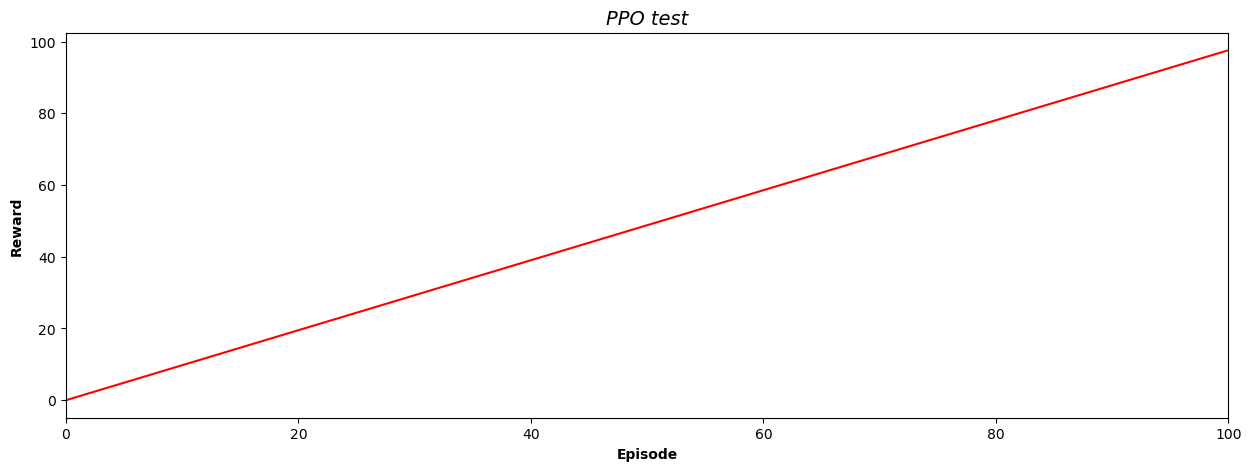

In [20]:
env = gym.make("MiniGrid-Empty-16x16-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO.load("./models/ppo_test.zip", env=env)
_, obs = env.reset()
model.learn(1e2)
eval_env(env, model, 100, "PPO test", "red")

# Transfer Environment

Output()


finished evaluating 100 eps. total_rewards: 32.041250000000005


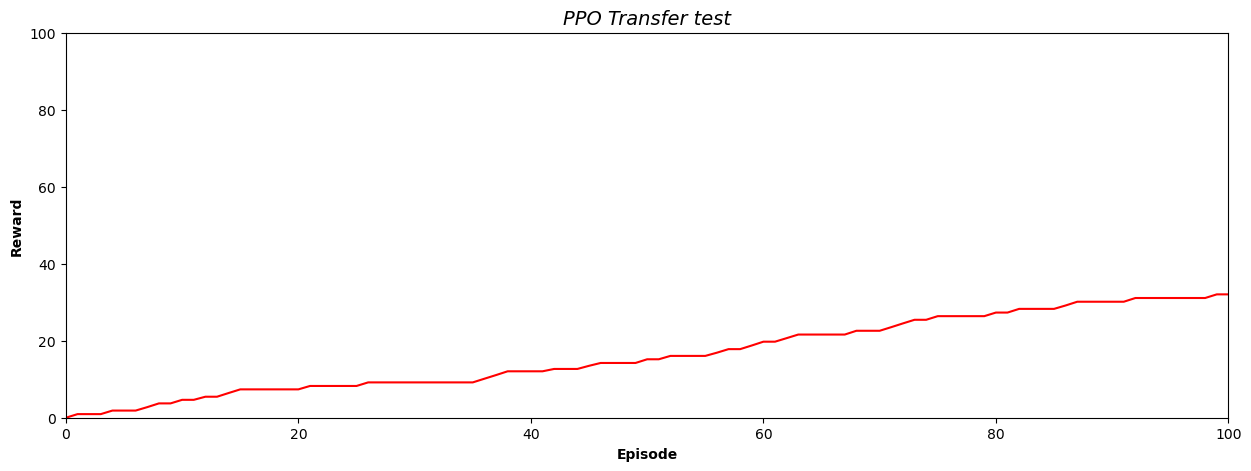

In [17]:
env = gym.make("MiniGrid-Fetch-8x8-N3-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)
model = PPO.load("./models/ppo_test.zip", env=env)
model.learn(1e5, progress_bar=True)
_, obs = env.reset()

eval_env(env, model, 100, "PPO Transfer test", "red")